# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="



In [4]:
city_name = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []


print("Beginning Data Retrieval")
print("----------------------------")
x=0
for city in cities: 
    try: 
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temps.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        #print(city_name)
    except KeyError: 
        print("city name not found")
        
        #print(city_name)
print("------------------------------")        
print("Data retrieval complete")
        
#try to use if statement to limit the amount that is searching--group of cities in a set, 20 at a time  
#try to use enumerate or iterrows

Beginning Data Retrieval
----------------------------
Processing Record 1 | mount isa
Processing Record 2 | norman wells
Processing Record 3 | ushuaia
Processing Record 4 | albany
Processing Record 5 | thompson
Processing Record 6 | mar del plata
Processing Record 7 | mildura
Processing Record 8 | rikitea
Processing Record 9 | paamiut
Processing Record 10 | marsassoum
Processing Record 11 | gat
Processing Record 12 | ilulissat
Processing Record 13 | punta arenas
Processing Record 14 | noumea
Processing Record 15 | shellbrook
Processing Record 16 | taolanaro
city name not found
Processing Record 17 | pemangkat
Processing Record 18 | port elizabeth
Processing Record 19 | ferkessedougou
Processing Record 20 | gimli
Processing Record 21 | hermanus
Processing Record 22 | korla
Processing Record 23 | orangeburg
Processing Record 24 | soria
Processing Record 25 | georgetown
Processing Record 26 | tahta
Processing Record 27 | eskasem
city name not found
Processing Record 28 | millport
Processi

Processing Record 236 | victoria
Processing Record 237 | souillac
Processing Record 238 | ilabaya
Processing Record 239 | ribeira grande
Processing Record 240 | tarko-sale
Processing Record 241 | cody
Processing Record 242 | oranjemund
Processing Record 243 | sarangani
Processing Record 244 | riyadh
Processing Record 245 | luwuk
Processing Record 246 | kutum
Processing Record 247 | tasiilaq
Processing Record 248 | hambantota
Processing Record 249 | monrovia
Processing Record 250 | soligalich
Processing Record 251 | san carlos
Processing Record 252 | nelson bay
Processing Record 253 | nalut
Processing Record 254 | taltal
Processing Record 255 | kiama
Processing Record 256 | longyearbyen
Processing Record 257 | portland
Processing Record 258 | qandala
Processing Record 259 | batagay-alyta
Processing Record 260 | senador jose porfirio
Processing Record 261 | kamina
Processing Record 262 | oktyabrskoye
Processing Record 263 | puerto escondido
Processing Record 264 | kaitangata
Processing R

Processing Record 475 | karamea
city name not found
Processing Record 476 | lakeside
Processing Record 477 | carutapera
Processing Record 478 | hay river
Processing Record 479 | senador guiomard
Processing Record 480 | kargasok
Processing Record 481 | linchuan
city name not found
Processing Record 482 | berlevag
Processing Record 483 | zhumadian
Processing Record 484 | palabuhanratu
city name not found
Processing Record 485 | omboue
Processing Record 486 | takoradi
Processing Record 487 | vila do maio
Processing Record 488 | vostok
Processing Record 489 | vestmannaeyjar
Processing Record 490 | kuytun
Processing Record 491 | pechory
Processing Record 492 | kloulklubed
Processing Record 493 | vao
Processing Record 494 | san ignacio
Processing Record 495 | phonhong
Processing Record 496 | port moresby
Processing Record 497 | makakilo city
Processing Record 498 | brigantine
Processing Record 499 | grajau
Processing Record 500 | pimentel
Processing Record 501 | tara
Processing Record 502 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#make a dataframe
##add lat_lngs
city_data_df = pd.DataFrame({"City Name": city_name, 
                             "Lat": lat,
                             "Lng": lng,
                              "Max Temp": max_temps, 
                              "Humidity": humidity, 
                              "Cloudiness": cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date})
city_data_df.head(10)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.73,139.50,68.00,56,0,8.05,AU,1603572799
1,Norman Wells,65.28,-126.83,21.20,92,75,4.70,CA,1603572799
2,Ushuaia,-54.80,-68.30,50.00,70,75,8.05,AR,1603572717
3,Albany,42.60,-73.97,55.99,68,45,14.00,US,1603572678
4,Thompson,55.74,-97.86,24.80,53,90,9.17,CA,1603572586
5,Mar del Plata,-38.00,-57.56,60.80,93,90,8.05,AR,1603572554
6,Mildura,-34.20,142.15,45.00,87,0,8.05,AU,1603572634
7,Rikitea,-23.12,-134.97,74.64,83,84,22.82,PF,1603572800
8,Paamiut,61.99,-49.67,30.96,86,18,9.28,GL,1603572800
9,Marsassoum,12.83,-15.98,83.05,57,47,3.87,SN,1603572800


In [6]:
#export to .csv
city_data_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_onehundred = city_data_df.loc[city_data_df["Humidity"]>100]
humid_cities_onehundred = humidity_over_onehundred["City Name"].count()
humid_cities_onehundred

0

In [8]:
#add if else 
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_df = city_data_df[city_data_df["Humidity"]>100]
#clean_df

In [30]:
#convert the timestamp to a date
# timestamp = time.localtime(city_data_df["Date"][0])
# date = f"{time.tm_mon}-{time.tm_mday}-{time.tm_year}"
# date


AttributeError: module 'time' has no attribute 'tm_mon'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

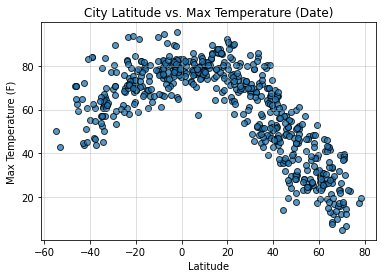

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVStemp.png")
plt.show()
#use images in ReadMe on GitHub, choose at least all latitude plots, and some others 

## Latitude vs. Humidity Plot

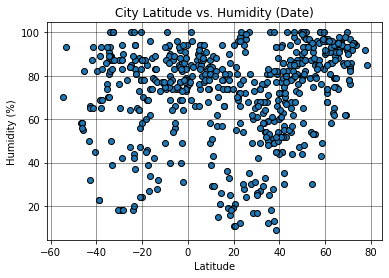

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVShumidity.png")
plt.show()
plt.show()

## Latitude vs. Cloudiness Plot

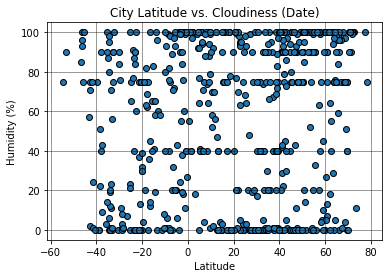

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVScloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

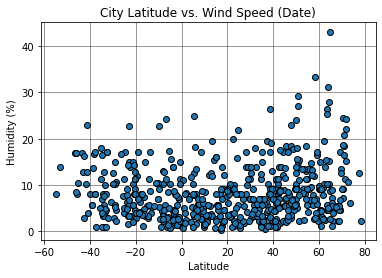

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVSwindspeed.png")
plt.show()

## Linear Regression

In [13]:
#make a df with the Northern Hemisphere cities
#city_data_df.loc[city_data_df["Humidity"]>80]

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Norman Wells,65.28,-126.83,21.20,92,75,4.70,CA,1603572799
3,Albany,42.60,-73.97,55.99,68,45,14.00,US,1603572678
4,Thompson,55.74,-97.86,24.80,53,90,9.17,CA,1603572586
8,Paamiut,61.99,-49.67,30.96,86,18,9.28,GL,1603572800
9,Marsassoum,12.83,-15.98,83.05,57,47,3.87,SN,1603572800


In [14]:
#make a df with the Southern Hemisphere cities
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.73,139.50,68.00,56,0,8.05,AU,1603572799
2,Ushuaia,-54.80,-68.30,50.00,70,75,8.05,AR,1603572717
5,Mar del Plata,-38.00,-57.56,60.80,93,90,8.05,AR,1603572554
6,Mildura,-34.20,142.15,45.00,87,0,8.05,AU,1603572634
7,Rikitea,-23.12,-134.97,74.64,83,84,22.82,PF,1603572800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7647558503874967
The r-value is: -0.874503202045308


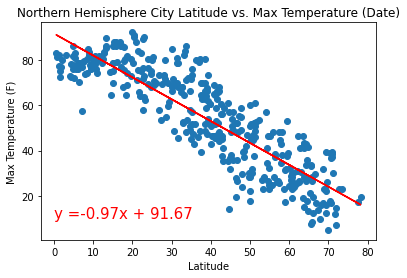

In [18]:
#create scatter plot
# plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# #add regression line
# plt.plot(lat, max_temps, "r-")

#create variable for Northern Hemisphere data for plot
# northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]

# n_lat = northern_hemi_df.loc[northern_hemi_df["Lat"]]

#Define x, y values
n_max_temp_x_values = northern_hemi_df["Lat"]
n_max_temp_y_values = northern_hemi_df["Max Temp"]

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plt.rc('grid', linestyle="-", color='black')
#plt.grid(True, alpha=0.5)

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_max_temp_slope, n_max_temp_intercept, n_max_temp_rvalue, n_max_temp_pvalue, n_max_temp_stderr) = linregress(n_max_temp_x_values, n_max_temp_y_values)
n_max_temp_regress_values = np.asarray(n_max_temp_x_values) * n_max_temp_slope + n_max_temp_intercept

#calculate r-squared
n_max_temp_rsquared = n_max_temp_rvalue**2
print(f"The r-squared is: {n_max_temp_rsquared}")

print(f"The r-value is: {n_max_temp_rvalue}")

#line equation y = mx + b
n_max_temp_line_eq = "y =" + str(round(n_max_temp_slope,2)) + "x + " + str(round(n_max_temp_intercept,2))

#create scatter plot
plt.scatter(n_max_temp_x_values, n_max_temp_y_values)
#add regression line
plt.plot(n_max_temp_x_values, n_max_temp_regress_values, "r-")

#add annotation to plot
plt.annotate(n_max_temp_line_eq,(0,10), fontsize=15, color="red")

plt.savefig("Images/n_hemi_latitudeVStemp.png")
plt.show()

##change r-squared to r-value? 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression